![image](https://storage.googleapis.com/kaggle-datasets-images/3681376/6387224/9930d4e357db50d4caa8d1765bc582ca/dataset-cover.jpeg?t=2023-08-30-06-07-48)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Introduction</p></div>

The occurrences of Ebola outbreaks before the year 2014 offer a crucial historical context for understanding the devastating impact of the virus on public health systems and communities. These earlier outbreaks, spanning from the late 20th century to the early 21st century, provide insights into the virus's origins, transmission dynamics, and the global response to mitigate its spread. Despite being less frequent and widespread compared to the 2014 outbreak, these incidents underscore the urgent need for preparedness and effective response strategies to address emerging infectious diseases. This brief exploration delves into the pre-2014 Ebola outbreaks, shedding light on the lessons learned and their significance in shaping our approach to managing future health crises.

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import re as re
from collections import Counter
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
tqdm.pandas()

import math
from colorama import Style, Fore

# Color settings
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#F9C74F",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

# Colorama color codes
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Data Preprocessing</p></div>


#### 🔴 Load the dataset into a Pandas DataFrame.

#### 🔴 Check for missing values and handle them if necessary.

#### 🔴 summary table shows missing value (%), unique value, minimum and maximum value of each variables.

#### 🔴 Convert data types if needed (e.g., converting 'Year(s)' to datetime, 'Reported % of deaths among cases' to numeric).


In [2]:
# Load the dataset into a Pandas DataFrame
file_path = '/kaggle/input/ebola-outbreaks-before-2014/ebola-outbreaks-before-2014.xlsx'
df = pd.read_excel(file_path)

In [3]:
df.head().style.background_gradient(cmap='tab20c')

,Year(s),Country,Ebola subtype,Reported number of human cases,Reported number of deaths among cases,Reported % of deaths among cases
0,November 2012-January 2013,Uganda,Sudan virus,6,3,0.500000
1,June-November 2012,Democratic Republic of the Congo,Bundibugyo virus,36,13,0.361000
2,June-October 2012,Uganda,Sudan virus,11,4,0.364000
3,May 2011,Uganda,Sudan virus,1,1,1.000000
4,December 2008-February 2009,Democratic Republic of the Congo,Zaire virus,32,15,0.470000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year(s)                                33 non-null     object 
 1   Country                                33 non-null     object 
 2   Ebola subtype                          33 non-null     object 
 3   Reported number of human cases         33 non-null     int64  
 4   Reported number of deaths among cases  33 non-null     int64  
 5   Reported % of deaths among cases       33 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ KB


In [5]:
df.columns

Index(['Year(s)', 'Country', 'Ebola subtype', 'Reported number of human cases',
       'Reported number of deaths among cases',
       'Reported % of deaths among cases'],
      dtype='object')

In [6]:
# summary table function
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

In [7]:
summary(df).style.background_gradient(cmap='tab20c')

data shape: (33, 6)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
Year(s),object,0,0.000000,25,nan,nan,November 2012-January 2013,June-November 2012,June-October 2012
Country,object,0,0.000000,15,nan,nan,Uganda,Democratic Republic of the Congo,Uganda
Ebola subtype,object,0,0.000000,5,nan,nan,Sudan virus,Bundibugyo virus,Sudan virus
Reported number of human cases,int64,0,0.000000,24,0.000000,425.000000,6,36,11
Reported number of deaths among cases,int64,0,0.000000,21,0.000000,280.000000,3,13,4
Reported % of deaths among cases,float64,0,0.000000,20,0.000000,1.000000,0.500000,0.361000,0.364000


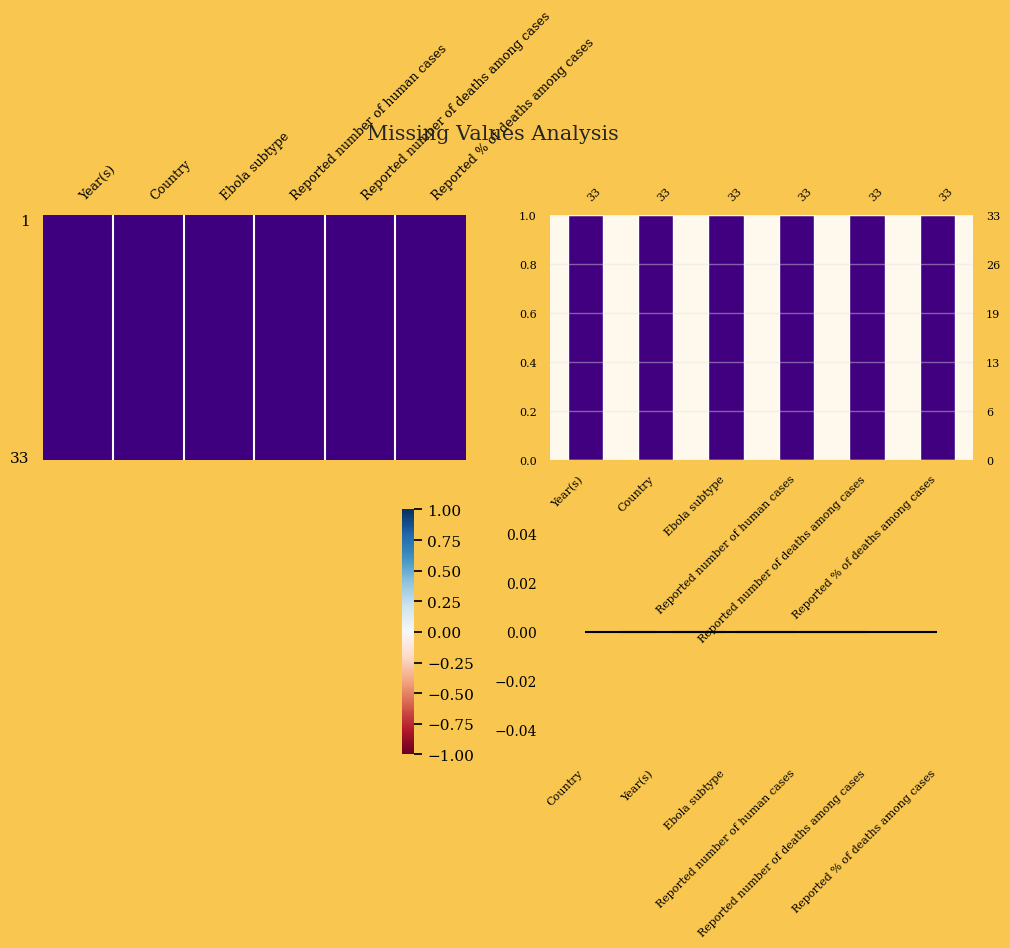

In [8]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(df, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(df,fontsize=8,ax=axs[2]);
msno.dendrogram(df,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15);


In [9]:
df.describe().style.background_gradient(cmap='tab20c')

,Reported number of human cases,Reported number of deaths among cases,Reported % of deaths among cases
count,33.000000,33.000000,33.000000
mean,71.545455,46.909091,0.489848
std,115.301532,79.817512,0.360694
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,17.000000,7.000000,0.530000
75%,60.000000,43.000000,0.810000
max,425.000000,280.000000,1.000000


In [10]:
# Extract midpoint years from 'Year(s)' column
df['Midpoint Year'] = df['Year(s)'].str.extract(r'(\d{4})')
df['Midpoint Year'] = df['Midpoint Year'].fillna('0')  # Replace NaN with '0'

# Convert 'Midpoint Year' column to integers
df['Midpoint Year'] = df['Midpoint Year'].astype(int)


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Exploratory Data Analysis (EDA)</p></div>



# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>1. </b>Temporal Analysis</p></div>



#### 🔴 Visualize the distribution of outbreaks over the years.

#### 🔴 Analyze the duration of outbreaks.

#### 🔴 Investigate any seasonality or trends in outbreak occurrence.

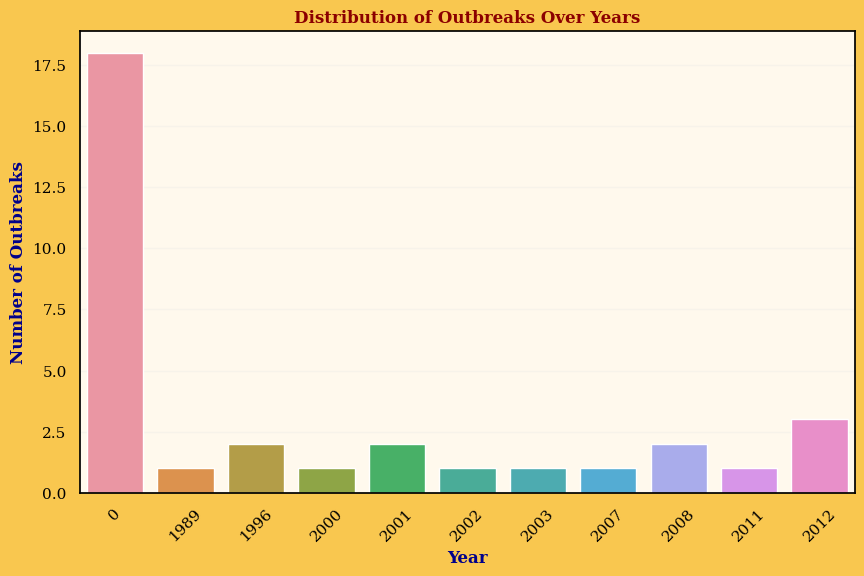

In [11]:
# Visualize the distribution of outbreaks over the years
cmap = plt.get_cmap('tab20')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Midpoint Year')
plt.title('Distribution of Outbreaks Over Years', fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel('Year',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Number of Outbreaks',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Distribution of Outbreaks Over Years.png')
plt.show()

In [12]:
# Explore the relationship between outbreak frequency and country
country_frequency = df['Country'].value_counts()
print("Outbreak Frequency by Country:\n", country_frequency)

Outbreak Frequency by Country:
 Uganda                                               5
Gabon                                                4
Democratic Republic of the Congo                     3
Philippines                                          3
Sudan (South Sudan)                                  3
Republic of the Congo                                3
USA                                                  3
Russia                                               2
South Africa                                         1
Democratic Republic of the Congo (formerly Zaire)    1
Côte d'Ivoire (Ivory Coast)                          1
Italy                                                1
Zaire                                                1
England                                              1
Zaire (Democratic Republic of the Congo - DRC)       1
Name: Country, dtype: int64


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>2. </b> Ebola Subtype Analysis</p></div>

#### 🔴  Analyze the distribution of different Ebola subtypes.

#### 🔴  Investigate the severity of outbreaks based on subtype.

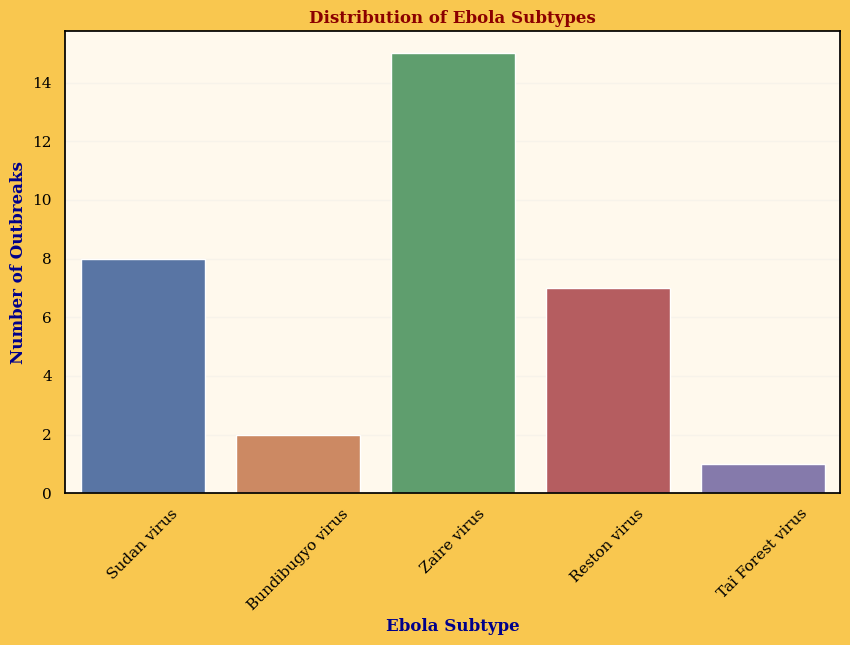

In [13]:
# Analyze the distribution of different Ebola subtypes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ebola subtype')
plt.title('Distribution of Ebola Subtypes', fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel('Ebola Subtype',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Number of Outbreaks',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Distribution of Ebola Subtypes.png')
plt.show()

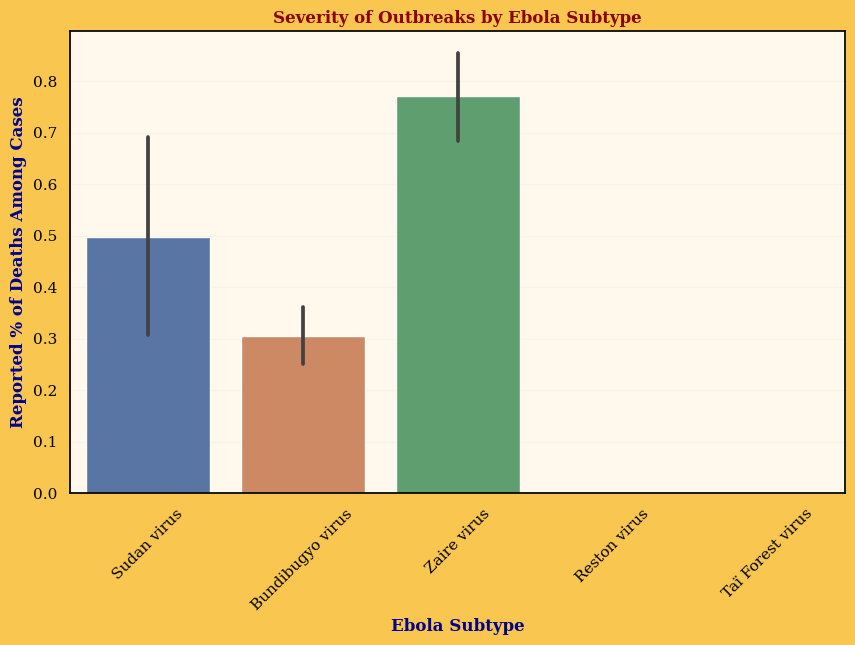

In [14]:
# Investigate the severity of outbreaks based on subtype
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ebola subtype', y='Reported % of deaths among cases')
plt.title('Severity of Outbreaks by Ebola Subtype', fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel('Ebola Subtype',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Reported % of Deaths Among Cases',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Severity of Outbreaks by Ebola Subtype.png')
plt.show()

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>3. </b> Case and Death Analysis</p></div>

#### 🔴 Calculate and visualize the total reported cases and deaths over time.

#### 🔴 Analyze the case-fatality ratio (deaths/cases) over different outbreaks.

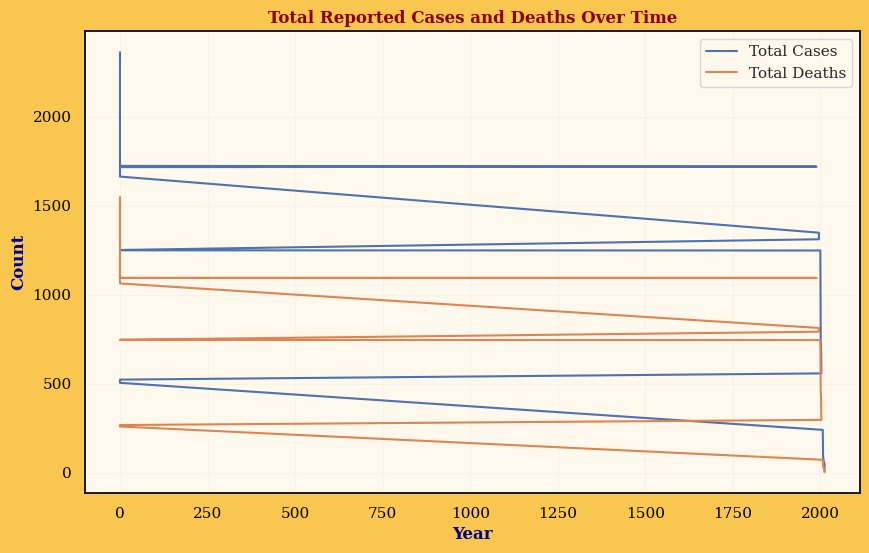

In [15]:
# Calculate total cases and deaths over time
df['Total Cases'] = df['Reported number of human cases'].cumsum()
df['Total Deaths'] = df['Reported number of deaths among cases'].cumsum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Midpoint Year'], df['Total Cases'], label='Total Cases')
plt.plot(df['Midpoint Year'], df['Total Deaths'], label='Total Deaths')
plt.title('Total Reported Cases and Deaths Over Time', fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel('Year',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend()
plt.savefig('Total Reported Cases and Deaths Over Time.png')
plt.show()

In [16]:
# Analyze the case-fatality ratio (deaths/cases) over different outbreaks
df['Case Fatality Ratio'] = df['Reported number of deaths among cases'] / df['Reported number of human cases']
print("Case Fatality Ratio:\n", df[['Year(s)', 'Case Fatality Ratio']])

Case Fatality Ratio:
                         Year(s)  Case Fatality Ratio
0    November 2012-January 2013             0.500000
1            June-November 2012             0.361111
2             June-October 2012             0.363636
3                      May 2011             1.000000
4   December 2008-February 2009             0.468750
5                      Nov 2008             0.000000
6    December 2007-January 2008             0.248322
7                          2007             0.708333
8                          2004             1.000000
9                          2004             0.411765
10       November-December 2003             0.828571
11     December 2002-April 2003             0.895105
12      October 2001-March 2002             0.754386
13      October 2001-March 2002             0.815385
14                    2000-2001             0.527059
15                         1996             1.000000
16                         1996                  NaN
17                      

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>4. </b> Correlation Analysis</p></div>


#### 🔴 Explore correlations between the reported number of cases, reported number of deaths, and reported % of deaths.

#### 🔴 Visualize correlations using scatter plots or correlation matrices.


Correlation Matrix:
                                        Reported number of human cases  \
Reported number of human cases                               1.000000   
Reported number of deaths among cases                        0.958204   
Reported % of deaths among cases                             0.298375   

                                       Reported number of deaths among cases  \
Reported number of human cases                                      0.958204   
Reported number of deaths among cases                               1.000000   
Reported % of deaths among cases                                    0.374834   

                                       Reported % of deaths among cases  
Reported number of human cases                                 0.298375  
Reported number of deaths among cases                          0.374834  
Reported % of deaths among cases                               1.000000  


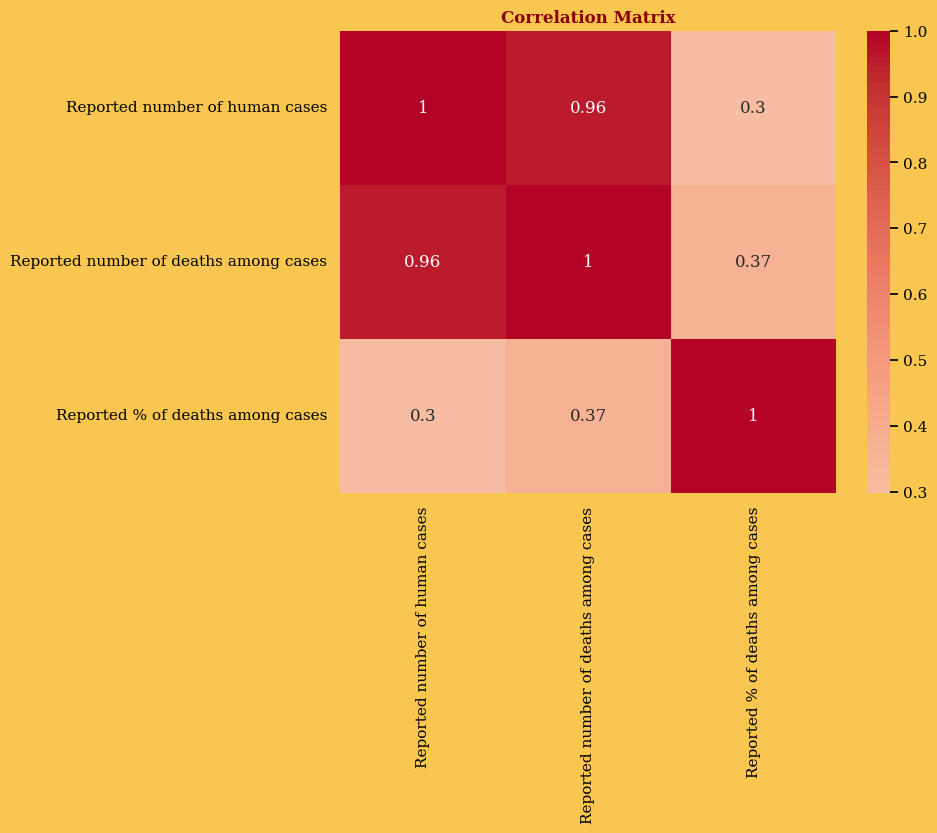

In [17]:
# Explore correlations between reported number of cases, reported number of deaths, and reported % of deaths
correlation_matrix = df[['Reported number of human cases', 'Reported number of deaths among cases', 'Reported % of deaths among cases']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.savefig('Correlation Matrix.png')
plt.show()


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Numerical Feature Distributions</p></div>


<Figure size 1200x800 with 0 Axes>

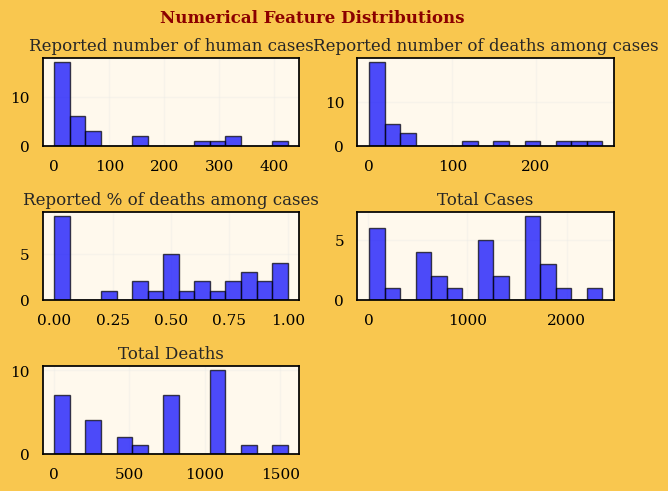

In [18]:
# Select numerical columns for the distributions
numerical_columns = ['Reported number of human cases', 'Reported number of deaths among cases',
                     'Reported % of deaths among cases', 'Total Cases', 'Total Deaths']

# Plot numerical feature distributions using histograms
plt.figure(figsize=(12, 8))
df[numerical_columns].hist(bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.tight_layout()
plt.suptitle('Numerical Feature Distributions', y=1.02,fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.savefig('Numerical Feature Distributions.png')
plt.show()

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#FF0000;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Build Model and Prediction</p></div>

In [19]:
# Select features and target variable
X = df[['Reported number of human cases', 'Reported % of deaths among cases', 'Total Cases', 'Total Deaths']]
y = df['Reported number of deaths among cases']

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 365.56


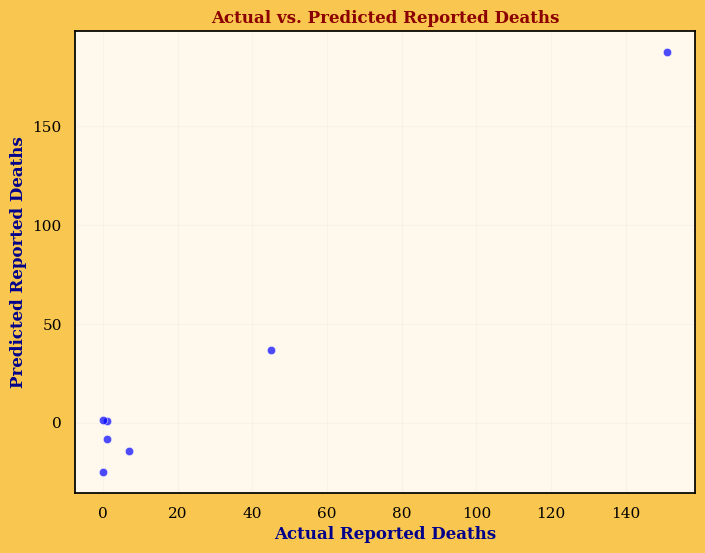

In [21]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Create a Seaborn plot to visualize the actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Reported Deaths',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Predicted Reported Deaths',fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Actual vs. Predicted Reported Deaths', fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.savefig('Actual vs. Predicted Reported Deaths.png')
plt.show()

<div class="alert alert-block alert-info"> 📌 "Hey there! Your positive feedback and support for my notebook mean the world to me! It motivates me to create more valuable content. If you can spare a moment to give it an upvote, it would help others discover and benefit from it too. Together, let's foster a vibrant community of knowledge-sharing and empowerment. Thank you for considering it, and continued success on your learning journey!"😊</div>